In [111]:
# Comprensión de los Datos

In [112]:
#importa librerías
import pandas as pd
import matplotlib.pyplot as plt

# Descripción de Variables


Pregnancies: Cuantitativa Discreta   
Glucose  : Cuantitativa Continua    
BloodPressure  : Cuantitativa Continua    
SkinThickness  : Cuantitativa Continua    
Insulin  : Cuantitativa Continua  
BMI  : Cuantitativa Continua    
DiabetesPedigreeFunction  : Cuantitativa Continua    
Age  : Cuantitativa Discreta    
Outcome  : Categórica Nominal     


**Ejemplo:** Crear un objeto DataFrame con base en un archivo .csv

In [113]:
#lee archivo csv
diabetes = pd.read_csv("diabetes.csv")

In [114]:
#Usa función shape para revisar el total de renglones y columnas
diabetes.shape

(768, 9)

In [115]:
#Revisa los primeros 5 renglones del dataset usando la función head()
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [116]:
#Revisa los últimos 5 renglones del dataset usando la función tail()
diabetes.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [117]:
#Revisa la información mas completa del conjunto de datos usando la función info()
#Muestra el total de datos, las columnas y su tipo correspondiente, dice si contiene nulos o no
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [118]:
#revisa cuántos valores únicos tiene cada atributo del archivo usando la función nunique()
diabetes.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

## Exploración de Datos

In [119]:
#Revisa Valores nulos con funcion isnull().sum()
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [120]:
#utiliza la función describe() para obtener estadística básica. se puede incluir -0
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [121]:
# Como se puede observar, después de utilizar .describe, el valor mínimo de columnas como Glucose, BloodPressure y BMI es 0, por lo que es imposible para una persona viva tener estos valores (Datos faltantes)

In [122]:
# Cuento los ceros en las columnas donde no deberían existir
columnascero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
(diabetes[columnascero] == 0).sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [123]:
# ¿Cuántas personas tienen diabetes y cuántas no?
diabetes['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [124]:
# Esto quiere decir que del conjunto de datos compuesto por el total de individuos, 500 individuos son no diabéticos (representado por el 0) y 268 individuos son diabéticos (representado por el 1). Esto equivale a que el 65.1% corresponde a casos negativos, mientras que el 34.9% son casos positivos.

In [125]:
# Los agrupo por 'Outcome' y calculo la media de cada variable para ambos grupos
diabetes.groupby('Outcome').mean()  

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


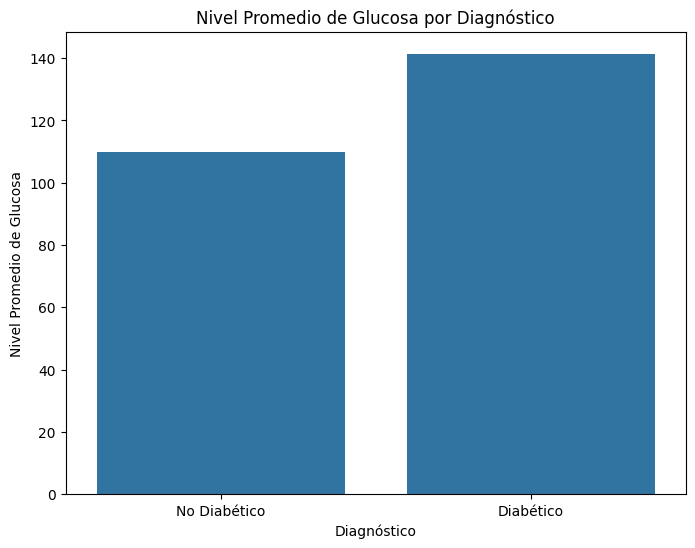

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

# Primero se calcula la media de glucosa por cada grupo
mean_glucose = diabetes.groupby('Outcome')['Glucose'].mean().reset_index()

# Creo el gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x='Outcome', y='Glucose', data=mean_glucose)

# Títulos
plt.title('Nivel Promedio de Glucosa por Diagnóstico')
plt.xlabel('Diagnóstico')
plt.ylabel('Nivel Promedio de Glucosa')
plt.xticks([0, 1], ['No Diabético', 'Diabético']) 

plt.show()

In [127]:
# El gráfico de barras muestra que el nivel promedio de glucosa en los pacientes diagnosticados con diabetes es significativamente más alto que en los pacientes no diabéticos. Aproximadamente 141 mg/dL para el grupo diabético frente a 110 mg/dL para el no diabético confirma visualmente que un nivel de glucosa elevado es una característica medible de los pacientes con diabetes en este conjunto de datos. 

In [128]:
import pandas as pd

# Creo los rangos de edad
bins = [20, 30, 40, 50, 60, 90]
labels = ['21-30', '31-40', '41-50', '51-60', '60+']
diabetes['EdadGrupo'] = pd.cut(diabetes['Age'], bins=bins, labels=labels, right=False)

# Creo y muestro
print("Conteo de Pacientes por Grupo de Edad y Diagnóstico")
crosstab_counts = pd.crosstab(diabetes['EdadGrupo'], diabetes['Outcome'])
print(crosstab_counts)

# Tabla en porcentajes
print("Porcentaje de Diagnóstico dentro de cada Grupo de Edad")
crosstab_percent = pd.crosstab(diabetes['EdadGrupo'], diabetes['Outcome'], normalize='index')
print((crosstab_percent * 100).round(1).astype(str) + '%')

Conteo de Pacientes por Grupo de Edad y Diagnóstico
Outcome      0   1
EdadGrupo         
21-30      312  84
31-40       89  76
41-50       53  65
51-60       23  34
60+         23   9
Porcentaje de Diagnóstico dentro de cada Grupo de Edad
Outcome        0      1
EdadGrupo              
21-30      78.8%  21.2%
31-40      53.9%  46.1%
41-50      44.9%  55.1%
51-60      40.4%  59.6%
60+        71.9%  28.1%


/var/folders/09/7wnnyty121342djlrs6vbj000000gn/T/ipykernel_34174/561927634.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='EdadGrupo', y=1, data=edad_riesgo, palette='viridis')


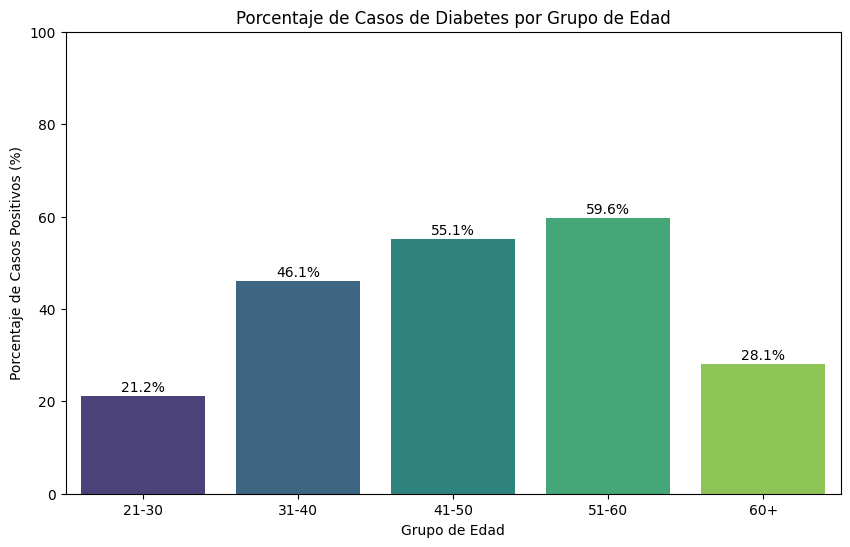

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

diabetes = pd.read_csv('diabetes.csv')

# Columna 'EdadGrupo'
bins = [20, 30, 40, 50, 60, 90]
labels = ['21-30', '31-40', '41-50', '51-60', '60+']
diabetes['EdadGrupo'] = pd.cut(diabetes['Age'], bins=bins, labels=labels, right=False)

# porcentaje de diabéticos por grupo de edad
edad_riesgo = pd.crosstab(diabetes['EdadGrupo'], diabetes['Outcome'], normalize='index')
edad_riesgo = (edad_riesgo[1] * 100).round(1).reset_index() # Multiplicamos por 100 y redondeamos

# gráfico
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='EdadGrupo', y=1, data=edad_riesgo, palette='viridis')

plt.title('Porcentaje de Casos de Diabetes por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Porcentaje de Casos Positivos (%)')

for index, row in age_risk.iterrows():
    barplot.text(row.name, row[1] + 1, f'{row[1]}%', color='black', ha="center")

plt.ylim(0, 100)
plt.show()

In [130]:
# Número total de pacientes en cada grupo de edad
print("Número de Pacientes por Grupo de Edad")
print(diabetes['EdadGrupo'].value_counts().sort_index())

Número de Pacientes por Grupo de Edad
EdadGrupo
21-30    396
31-40    165
41-50    118
51-60     57
60+       32
Name: count, dtype: int64


In [131]:
#Revisar valores únicos por columna usando función unique(): nombre-columna.unique()
diabetes.BMI.unique()

array([33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31. , 35.3, 30.5,  0. , 37.6,
       38. , 27.1, 30.1, 25.8, 30. , 45.8, 29.6, 43.3, 34.6, 39.3, 35.4,
       39.8, 29. , 36.6, 31.1, 39.4, 23.2, 22.2, 34.1, 36. , 31.6, 24.8,
       19.9, 27.6, 24. , 33.2, 32.9, 38.2, 37.1, 34. , 40.2, 22.7, 45.4,
       27.4, 42. , 29.7, 28. , 39.1, 19.4, 24.2, 24.4, 33.7, 34.7, 23. ,
       37.7, 46.8, 40.5, 41.5, 25. , 25.4, 32.8, 32.5, 42.7, 19.6, 28.9,
       28.6, 43.4, 35.1, 32. , 24.7, 32.6, 43.2, 22.4, 29.3, 24.6, 48.8,
       32.4, 38.5, 26.5, 19.1, 46.7, 23.8, 33.9, 20.4, 28.7, 49.7, 39. ,
       26.1, 22.5, 39.6, 29.5, 34.3, 37.4, 33.3, 31.2, 28.2, 53.2, 34.2,
       26.8, 55. , 42.9, 34.5, 27.9, 38.3, 21.1, 33.8, 30.8, 36.9, 39.5,
       27.3, 21.9, 40.6, 47.9, 50. , 25.2, 40.9, 37.2, 44.2, 29.9, 31.9,
       28.4, 43.5, 32.7, 67.1, 45. , 34.9, 27.7, 35.9, 22.6, 33.1, 30.4,
       52.3, 24.3, 22.9, 34.8, 30.9, 40.1, 23.9, 37.5, 35.5, 42.8, 42.6,
       41.8, 35.8, 37.8, 28.8, 23.6, 35.7, 36.7, 45

In [132]:
diabetes.Glucose.unique()

array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
       189, 166, 100, 118, 107, 103, 126,  99, 196, 119, 143, 147,  97,
       145, 117, 109, 158,  88,  92, 122, 138, 102,  90, 111, 180, 133,
       106, 171, 159, 146,  71, 105, 101, 176, 150,  73, 187,  84,  44,
       141, 114,  95, 129,  79,   0,  62, 131, 112, 113,  74,  83, 136,
        80, 123,  81, 134, 142, 144,  93, 163, 151,  96, 155,  76, 160,
       124, 162, 132, 120, 173, 170, 128, 108, 154,  57, 156, 153, 188,
       152, 104,  87,  75, 179, 130, 194, 181, 135, 184, 140, 177, 164,
        91, 165,  86, 193, 191, 161, 167,  77, 182, 157, 178,  61,  98,
       127,  82,  72, 172,  94, 175, 195,  68, 186, 198, 121,  67, 174,
       199,  56, 169, 149,  65, 190])

In [133]:
diabetes.BloodPressure.unique()

array([ 72,  66,  64,  40,  74,  50,   0,  70,  96,  92,  80,  60,  84,
        30,  88,  90,  94,  76,  82,  75,  58,  78,  68, 110,  56,  62,
        85,  86,  48,  44,  65, 108,  55, 122,  54,  52,  98, 104,  95,
        46, 102, 100,  61,  24,  38, 106, 114])

In [134]:
diabetes.Age.unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68])

## Variables Cuantitativas

### Medidas de tendencia central


In [135]:
# Calcular media, mediana y moda para la columna 'Age' del dataset de diabetes
mean_age = diabetes['Age'].mean()
median_age = diabetes['Age'].median()
mode_age = diabetes['Age'].mode()

print("Mean_age (Media):", mean_age)
print("Median_age (Mediana):", median_age)
print("Mode_age (Moda):", mode_age[0]) # Se usa [0] porque la moda puede devolver varios valores

Mean_age (Media): 33.240885416666664
Median_age (Mediana): 29.0
Mode_age (Moda): 22


Conclusiones:
La edad promedio fue 33  
La edad al centro es 29  
La edad más repetida fue de 22  

# Variables Categóricas

In [136]:
#Para conteo  de cada valor en una columna, en orden descendente usar función value_counts():    
# nombreDataframe.columna.value_counts()
# nombreDataframe['columna'].value_counts()
diabetes.Glucose.value_counts()

Glucose
99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: count, Length: 136, dtype: int64

In [137]:
#Revisa conteo de varias columnas
diabetes.Insulin.value_counts()

Insulin
0      374
105     11
130      9
140      9
120      8
      ... 
73       1
171      1
255      1
52       1
112      1
Name: count, Length: 186, dtype: int64

## Consulta

In [138]:
# df.iloc[i]: Accede a la fila en la posición i.
# Acceder a la primera fila.iloc[0]
diabetes.iloc[0]

Pregnancies                     6
Glucose                       148
BloodPressure                  72
SkinThickness                  35
Insulin                         0
BMI                          33.6
DiabetesPedigreeFunction    0.627
Age                            50
Outcome                         1
EdadGrupo                   51-60
Name: 0, dtype: object

In [139]:
# Acceder a las dos primeras filas
diabetes.iloc[:2]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,EdadGrupo
0,6,148,72,35,0,33.6,0.627,50,1,51-60
1,1,85,66,29,0,26.6,0.351,31,0,31-40


In [140]:
#Seleccionar columnas, indicando entre corchetes [nombreColumna, nombreColumna]
diabetes[["Age", "Glucose"]]

,Age,Glucose
0,50,148
1,31,85
2,32,183
3,21,89
4,33,137
...,...,...
763,63,101
764,27,122
765,30,121
766,47,126


In [141]:
#Selección de filas [indicar dataframe[columna] operador valor]
# Seleccionar pacientes menores de 30 años Y que tengan diabetes (Outcome == 1)
jovenes_diabeticos = diabetes[(diabetes['Age'] < 30) & (diabetes['Outcome'] == 1)]

# Mostrar las estadísticas descriptivas de este subgrupo específico
jovenes_diabeticos.describe().round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,84.00,84.00,84.00,84.00,84.00,84.00,84.00,84.00,84.0
mean,2.15,140.64,65.43,25.73,115.12,37.10,0.58,25.37,1.0
std,2.06,30.15,23.42,17.48,145.47,7.86,0.43,2.55,0.0
min,0.00,78.00,0.00,0.00,0.00,22.90,0.13,21.00,1.0
25%,0.00,119.00,61.50,0.00,0.00,31.60,0.28,23.00,1.0
50%,2.00,138.50,70.00,31.50,81.00,35.55,0.49,25.00,1.0
75%,3.00,163.75,80.00,39.00,170.25,42.32,0.70,28.00,1.0
max,9.00,199.00,110.00,63.00,579.00,67.10,2.42,29.00,1.0


In [142]:
jovenes_diabeticos.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,EdadGrupo
6,3,78,50,32,88,31.0,0.248,26,1,21-30
23,9,119,80,35,0,29.0,0.263,29,1,21-30
31,3,158,76,36,245,31.6,0.851,28,1,21-30
38,2,90,68,42,0,38.2,0.503,27,1,21-30
45,0,180,66,39,0,42.0,1.893,25,1,21-30


In [143]:
# Seleccionar a TODOS los pacientes con diabetes
pacientes_diabeticos = diabetes[diabetes['Outcome'] == 1]

# Mostrar estadísticas descriptivas
print("Estadísticas del Grupo General de Diabéticos")
pacientes_diabeticos.describe().round(2)

Estadísticas del Grupo General de Diabéticos


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,268.00,268.00,268.00,268.00,268.00,268.00,268.00,268.00,268.0
mean,4.87,141.26,70.82,22.16,100.34,35.14,0.55,37.07,1.0
std,3.74,31.94,21.49,17.68,138.69,7.26,0.37,10.97,0.0
min,0.00,0.00,0.00,0.00,0.00,0.00,0.09,21.00,1.0
25%,1.75,119.00,66.00,0.00,0.00,30.80,0.26,28.00,1.0
50%,4.00,140.00,74.00,27.00,0.00,34.25,0.45,36.00,1.0
75%,8.00,167.00,82.00,36.00,167.25,38.78,0.73,44.00,1.0
max,17.00,199.00,114.00,99.00,846.00,67.10,2.42,70.00,1.0


In [144]:
# El promedio de la DiabetesPedigreeFunction es un poco más alto en el grupo de jóvenes diabéticos (0.58) que en el de los pacientes diabéticos (0.55). Aunque no es una gran diferencia, sugiere una mayor influencia genética. 

/var/folders/09/7wnnyty121342djlrs6vbj000000gn/T/ipykernel_34174/894649777.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  glucosa_edad_outcome = diabetes.groupby(['EdadGrupo', 'Outcome'])['Glucose'].mean().reset_index()


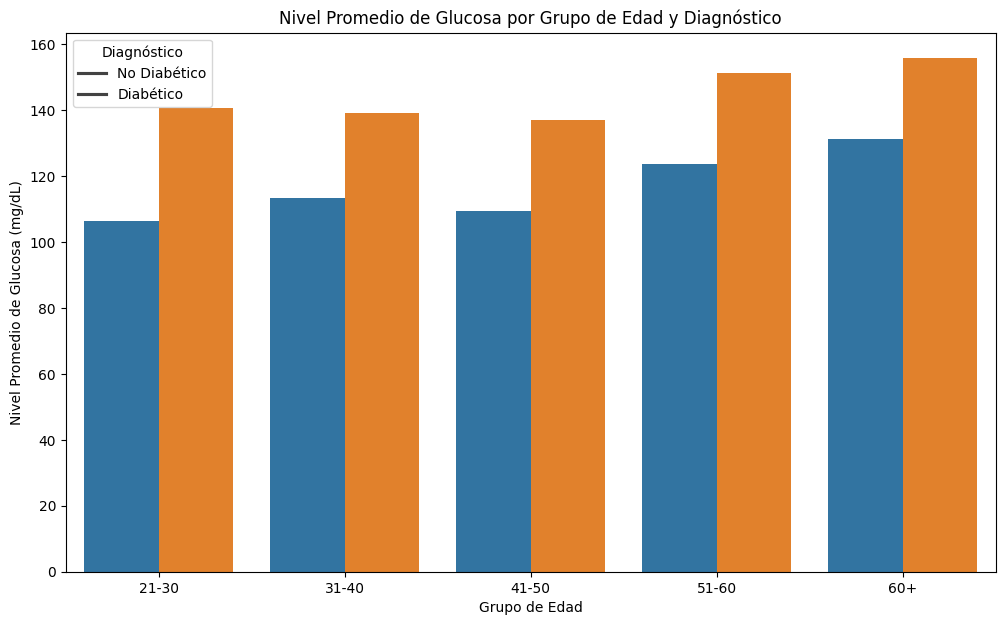

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

diabetes = pd.read_csv('diabetes.csv')

# Crear la columna 'EdadGrupo'
bins = [20, 30, 40, 50, 60, 90]
labels = ['21-30', '31-40', '41-50', '51-60', '60+']
diabetes['EdadGrupo'] = pd.cut(diabetes['Age'], bins=bins, labels=labels, right=False)

# promedio de glucosa (considerando Edad y outcome)
glucosa_edad_outcome = diabetes.groupby(['EdadGrupo', 'Outcome'])['Glucose'].mean().reset_index()

# gráfico
plt.figure(figsize=(12, 7))
sns.barplot(x='EdadGrupo', y='Glucose', hue='Outcome', data=glucosa_edad_outcome)

plt.title('Nivel Promedio de Glucosa por Grupo de Edad y Diagnóstico')
plt.xlabel('Grupo de Edad')
plt.ylabel('Nivel Promedio de Glucosa (mg/dL)')
plt.legend(title='Diagnóstico', labels=['No Diabético', 'Diabético'])
plt.show()

In [148]:
# Este gráfico que muestra el nivel promedio de glucosa, separado por grupo de edad, confirma que en todos los grupos de edad, la barra naranja (Diabético), es significativamente más alta que la barra azul (no Diabético). Refuerza la conclusión de que la glucosa elevada es un factor de riesgo de diabetes, sin importar la edad del paciente. Además, si nos fijamos únicamente en las barras azules, notaremos que tienden a subir ligeramente con la edad. Esto sugiere que, incluso en la población no diabética, los niveles de glucosa tienden a aumentar un poco con el envejecimiento. 

In [149]:
# CONCLUSIONES FINALES EN GITHUB

## Visualización de Datos

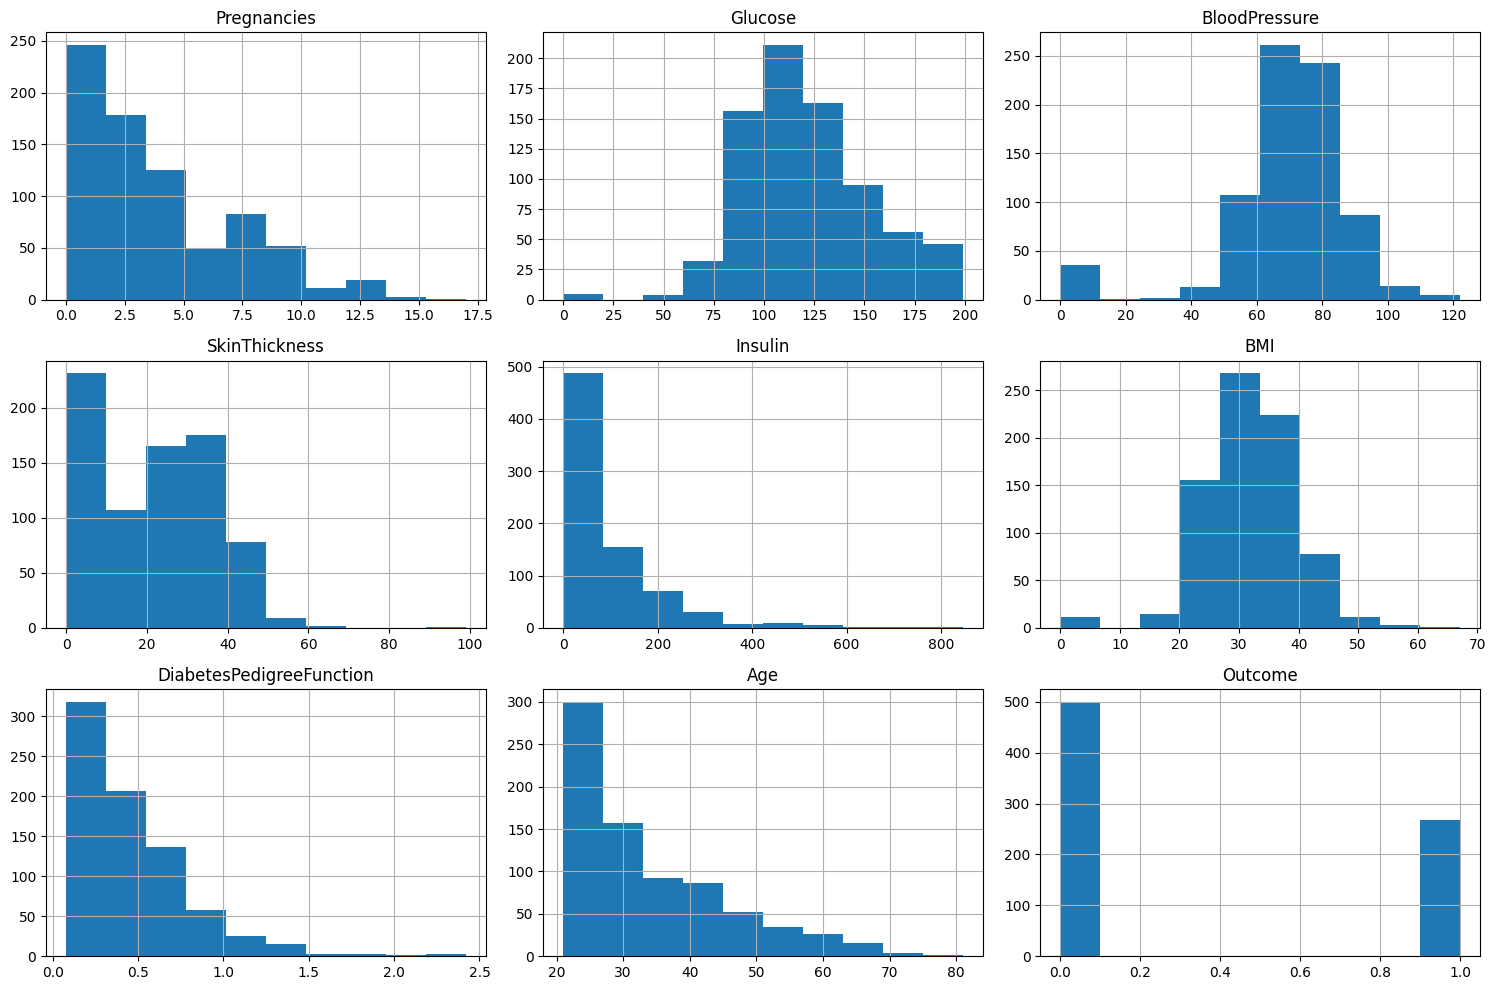

In [150]:
# histograma para cada variable numérica
diabetes.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

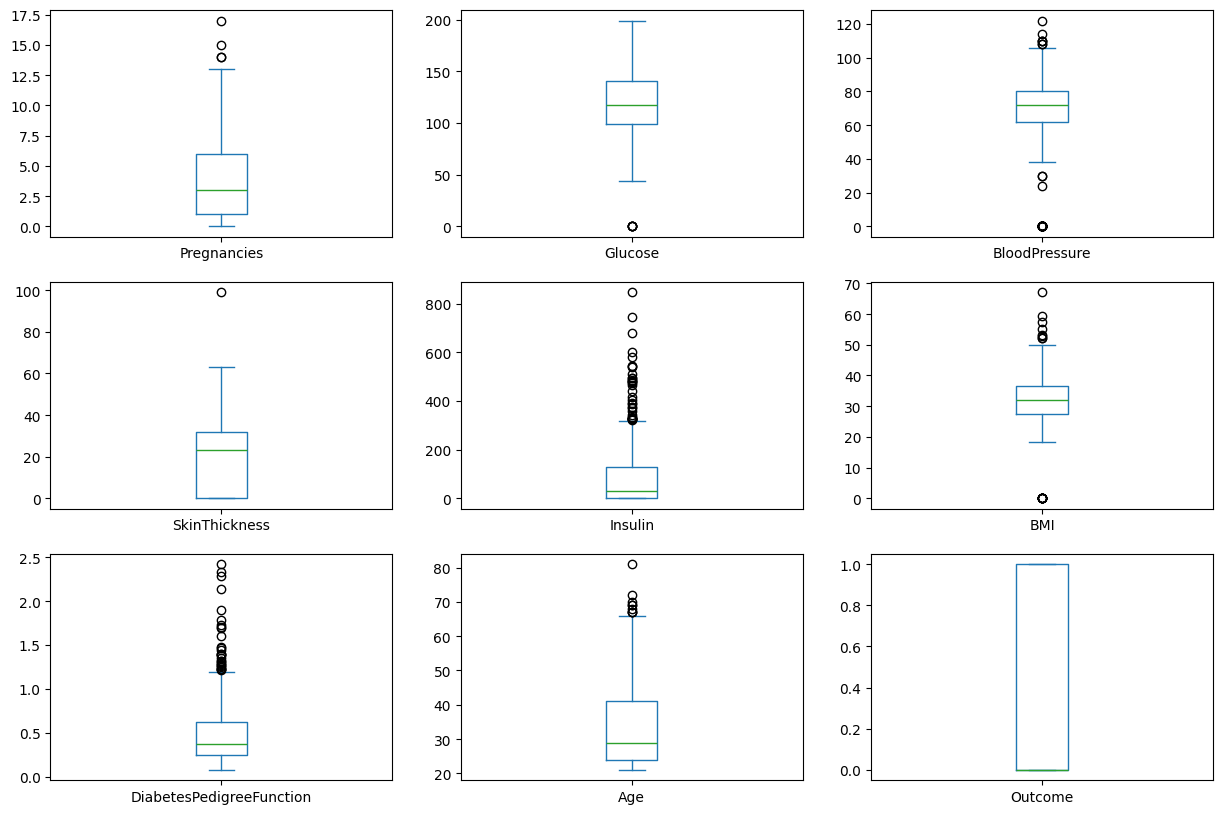

In [151]:
# boxplot para cada variable
diabetes.plot(kind='box', subplots=True, layout=(3,3), figsize=(15,10), sharex=False, sharey=False)
plt.show()

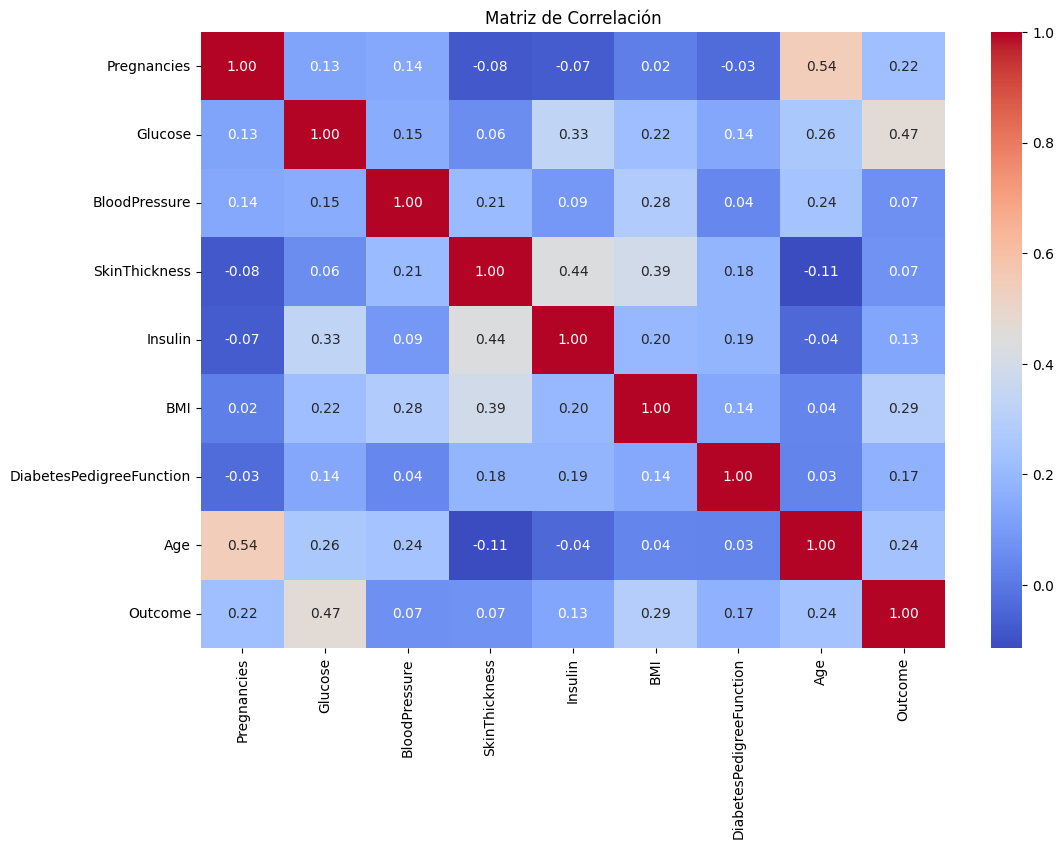

In [153]:
# Matriz de correlación
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

sns.heatmap(diabetes.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Matriz de Correlación')
plt.show()

In [ ]:
    # Hay alguna variable que no aporta información?
#En base a la matriz de correlación, las variables que no aportan información para predecir la diabetes son BloodPressure y SkinThickness.

    # Si tuvieras que eliminar variables, ¿cuáles quitarías y por qué?
# Quitaría las variables de BloodPressure y SkinThickness, debido a que no me aportan información para predecir la diabetes.

    # Si comparas el rango de las variables (min-max), ¿todas están en rangos similares?
# No, los rangos son muy diferentes. Por ejemplo, la variable Insulin va de 0 a 846, mientras que DiabetesPedigreeFunction va de 0.078 a 2.42.

    # ¿Existen variables que tengan datos atípicos?
# Sí, mirando el boxplot, algunas variables como Insulin, DiabetesPedigree Function y BMI presentan datos atípicos. 

    # Existe correlación alta entre variables?
# Sí, existe una correlación positiva moderada-alta entre las variables Age y Pregnancies (0.54). También está presente una correlación negativa entre BMI y Glucose (0.22). 